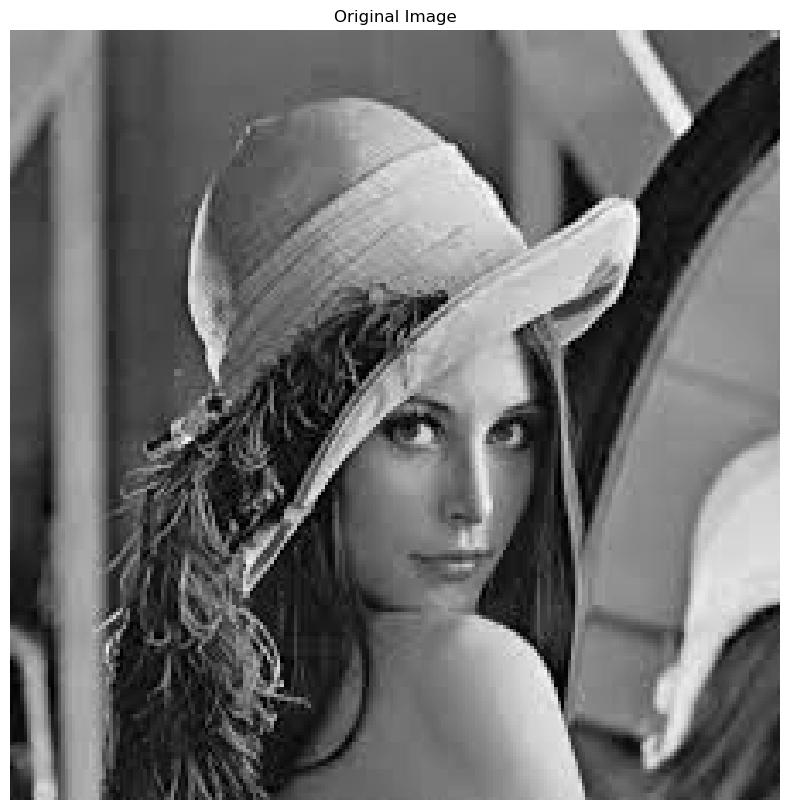

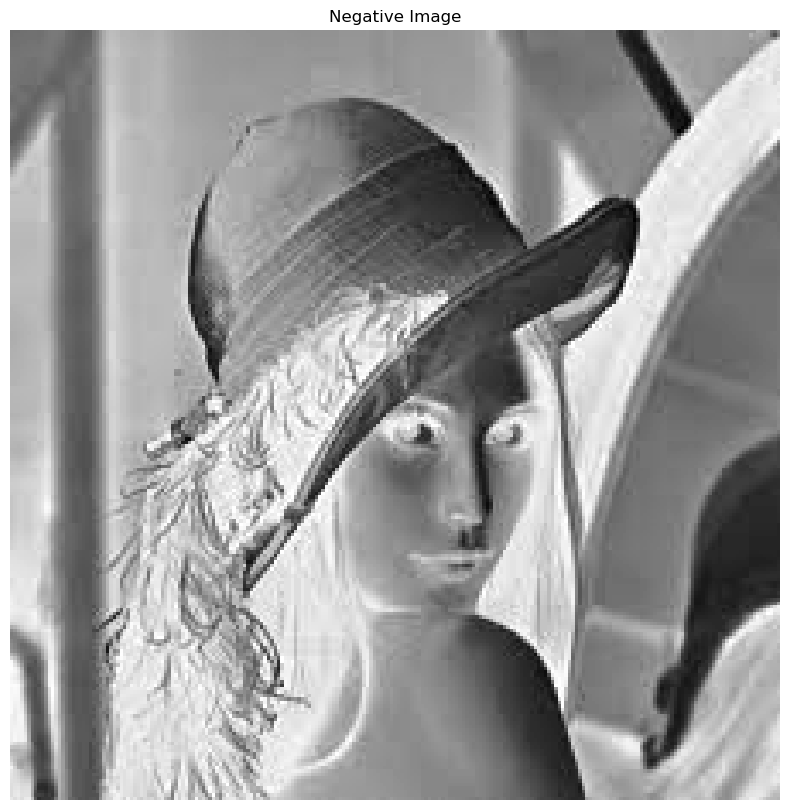

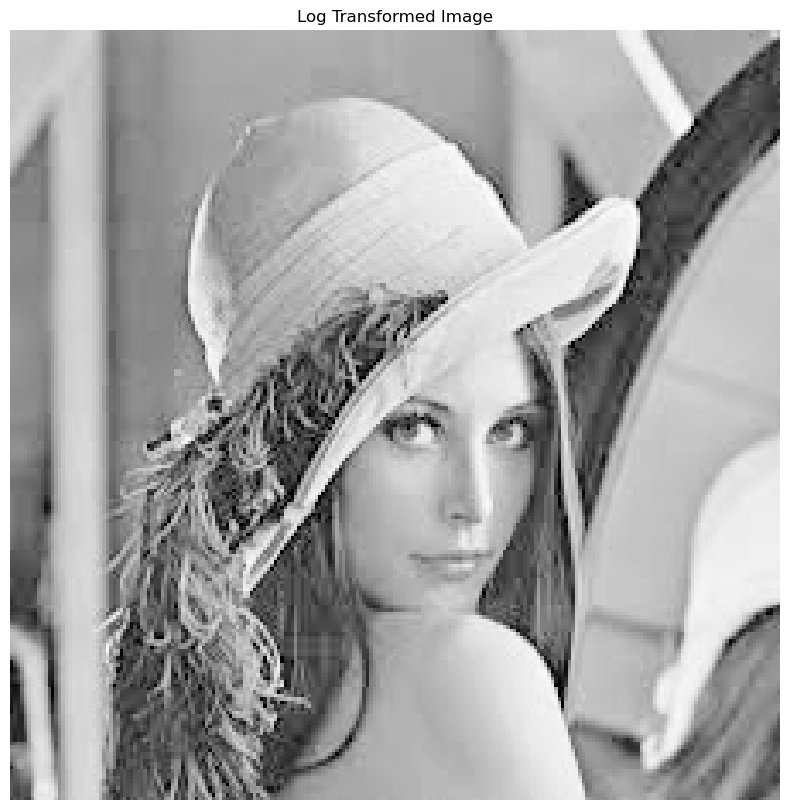

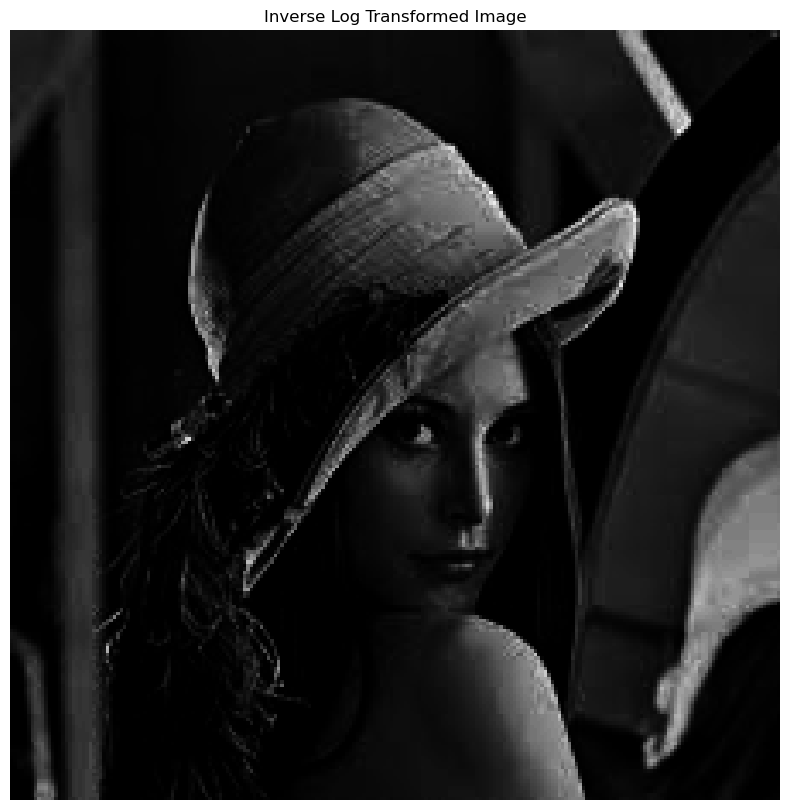

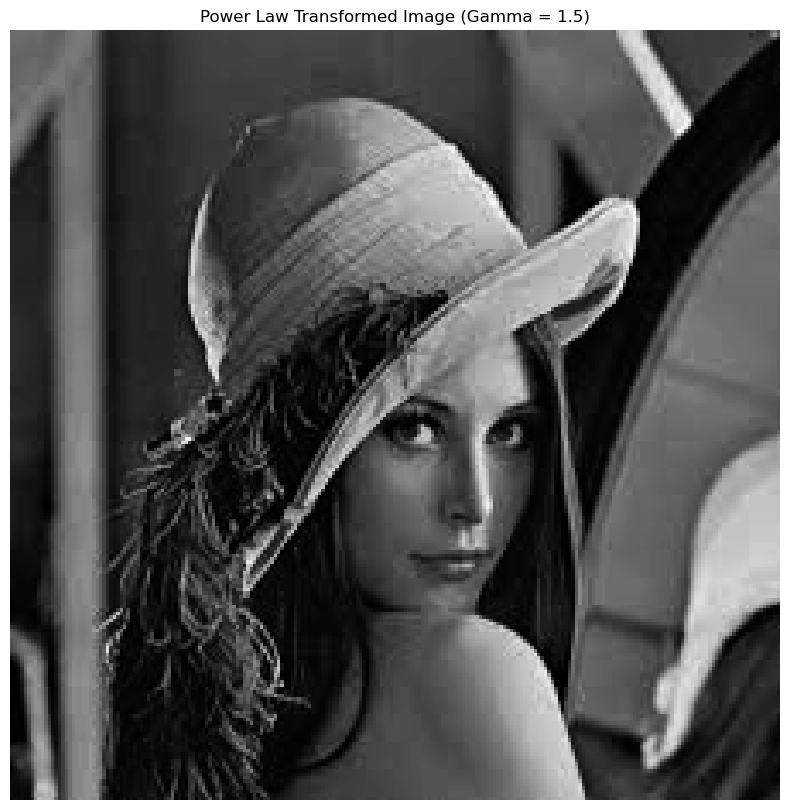

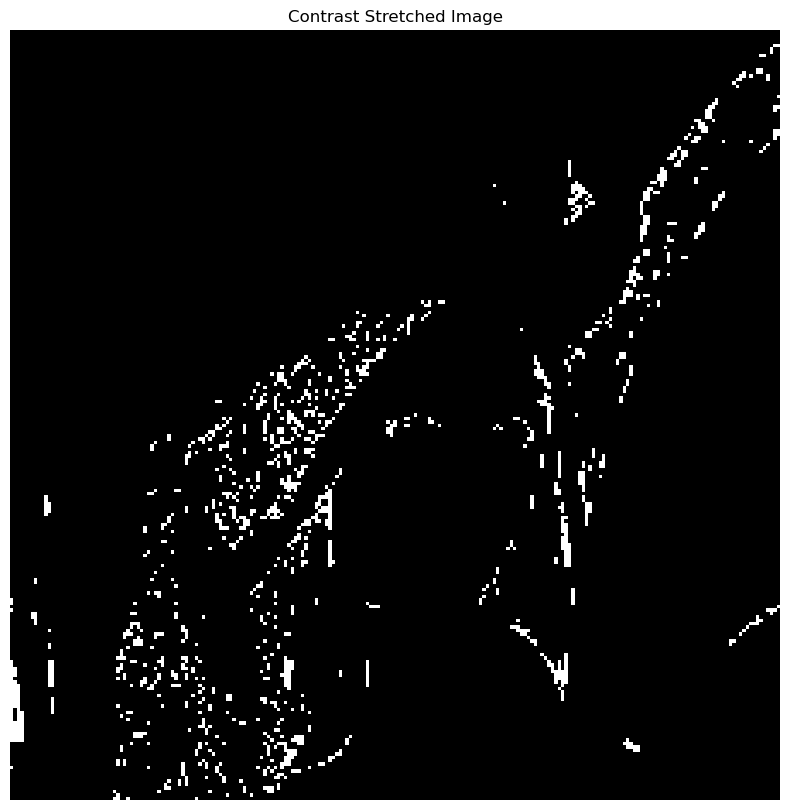

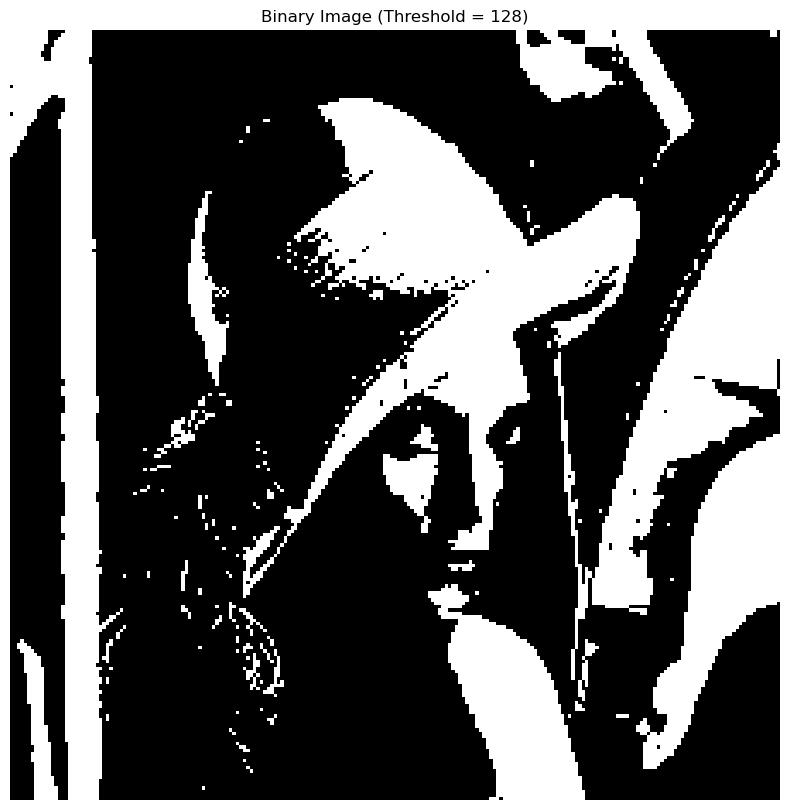

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
img = cv2.imread('Lena.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not found or the path is incorrect.")

plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

# a.Image Negative
negative_img = 255 - img
plt.figure(figsize=(10, 10))
plt.imshow(negative_img, cmap='gray')
plt.title('Negative Image')
plt.axis('off')
plt.show()

# b.Log Transformation and Inverse Log Transform
c = 10
log_img = np.log1p(img / 255.0 * c)  
log_img = np.uint8(255 * (log_img / np.max(log_img))) 
plt.figure(figsize=(10, 10))
plt.imshow(log_img, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')
plt.show()

# Inverse Log Transformation
inverse_log_img = np.expm1(log_img / 255.0 * c)  
inverse_log_img = np.uint8(255 * (inverse_log_img / np.max(inverse_log_img)))  
plt.figure(figsize=(10, 10))
plt.imshow(inverse_log_img, cmap='gray')
plt.title('Inverse Log Transformed Image')
plt.axis('off')
plt.show()

# c.Power Law Transformation
gamma = 1.5
power_law_img = np.power(img / 255.0, gamma) * 255
power_law_img = np.uint8(np.clip(power_law_img, 0, 255)) 
plt.figure(figsize=(10, 10))
plt.imshow(power_law_img, cmap='gray')
plt.title(f'Power Law Transformed Image (Gamma = {gamma})')
plt.axis('off')
plt.show()

# d. Contrast Stretching
min_val = np.min(img)
max_val = np.max(img)
stretched_img = np.clip((img - min_val) * 255 / (max_val - min_val), 0, 255).astype(np.uint8)
plt.figure(figsize=(10, 10))
plt.imshow(stretched_img, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')
plt.show()

# e. Gray Level Slicing
threshold = 128
binary_img = np.where(img > threshold, 255, 0).astype(np.uint8)
plt.figure(figsize=(10, 10))
plt.imshow(binary_img, cmap='gray')
plt.title(f'Binary Image (Threshold = {threshold})')
plt.axis('off')
plt.show()


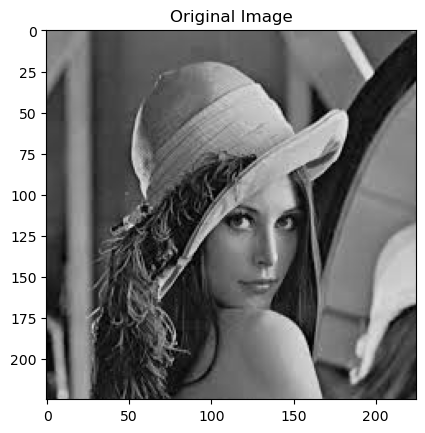

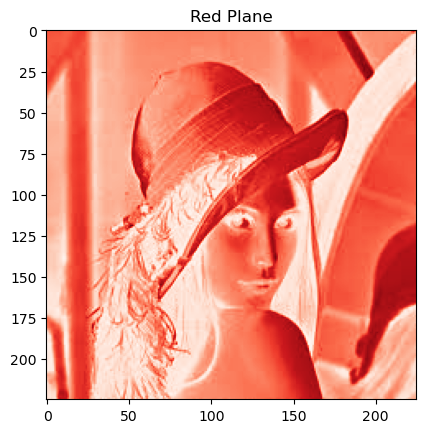

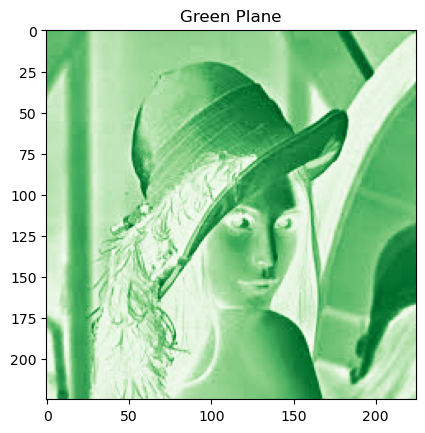

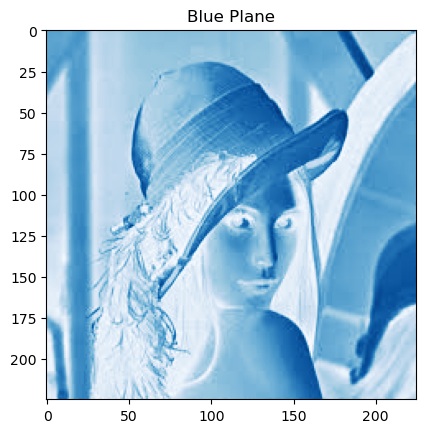

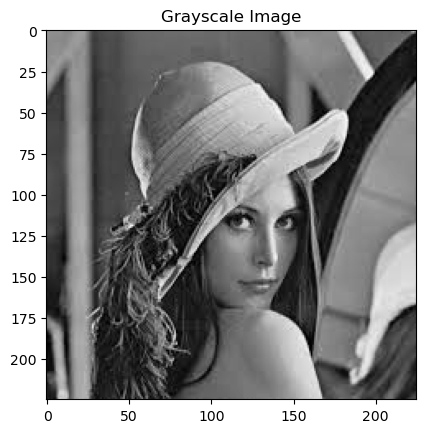

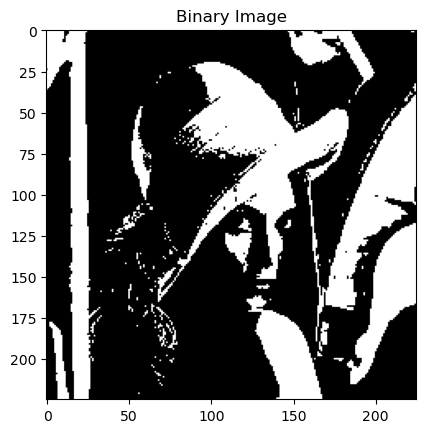

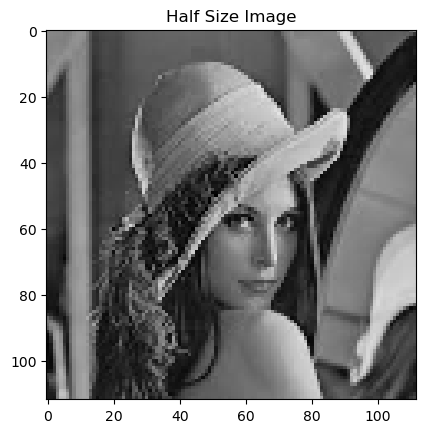

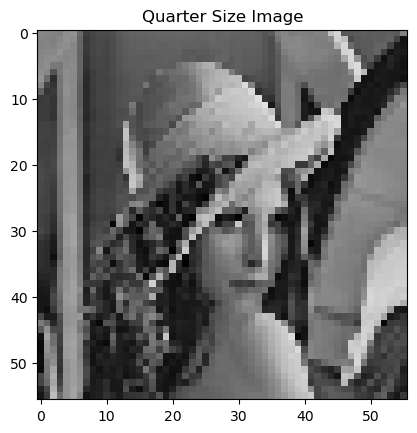

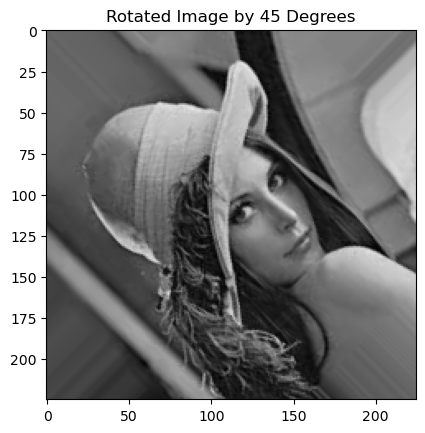

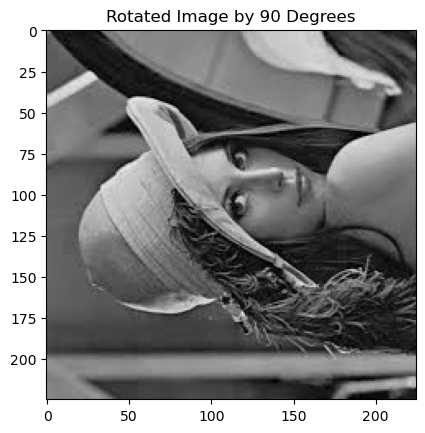

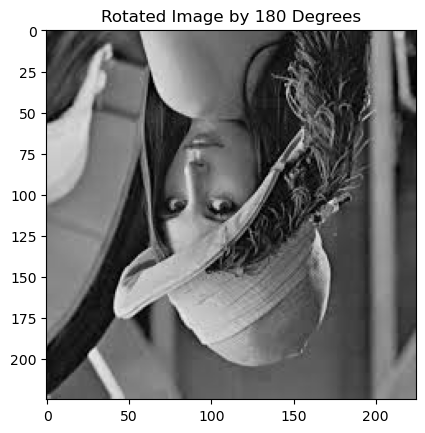

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def display_with_description(description, image, cmap=None):
    plt.figure()
    plt.title(description)
    if len(image.shape) == 2:  # Grayscale image
        plt.imshow(image, cmap=cmap)
    else:  # Color image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('on')  # Turn on the axes
    plt.show()

# a.Read,display and write an image
image = cv2.imread('Lena.jpg')  # Replace 'Lena.jpg' with your image file
display_with_description('Original Image', image)
cv2.imwrite('output_image.png', image)

# b.Find RED, GREEN, and BLUE planes
blue, green, red = cv2.split(image)

display_with_description('Red Plane', red, cmap='Reds')
display_with_description('Green Plane', green, cmap='Greens')
display_with_description('Blue Plane', blue, cmap='Blues')

# c.Convert color image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_with_description('Grayscale Image', gray_image, cmap='gray')

_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
display_with_description('Binary Image', binary_image, cmap='gray')

# d.Resize the image to half and quarter
half_size = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))
quarter_size = cv2.resize(image, (image.shape[1] // 4, image.shape[0] // 4))

display_with_description('Half Size Image', half_size)
display_with_description('Quarter Size Image', quarter_size)

# e.Rotate the image by 45, 90, and 180 degrees
def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    # Use the image size to avoid cropping
    rotated_image = cv2.warpAffine(image, matrix, (width, height), borderMode=cv2.BORDER_REPLICATE)
    return rotated_image

rotate_45 = rotate_image(image, 45)
rotate_90 = rotate_image(image, 90)
rotate_180 = rotate_image(image, 180)

display_with_description('Rotated Image by 45 Degrees', rotate_45)
display_with_description('Rotated Image by 90 Degrees', rotate_90)
display_with_description('Rotated Image by 180 Degrees', rotate_180)


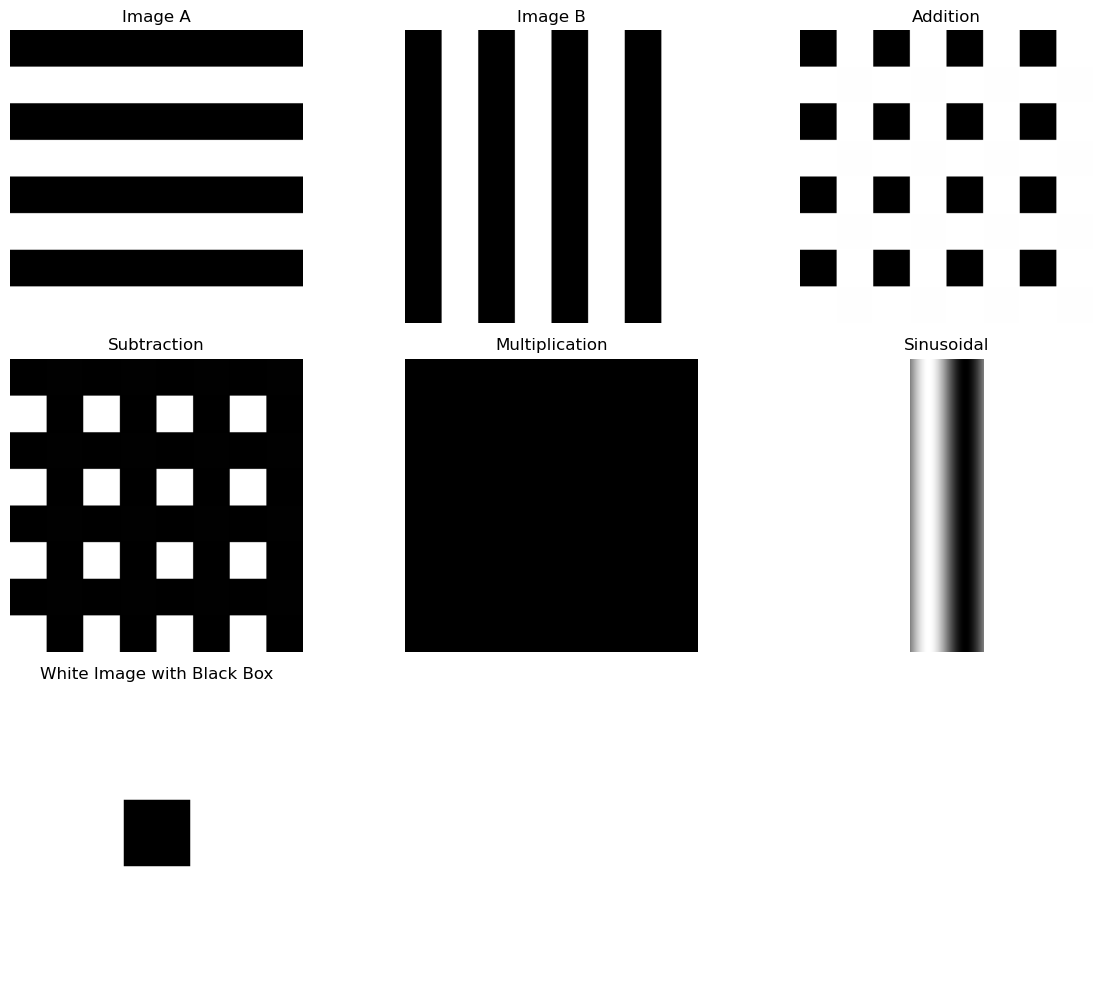

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# (a) Create Image A with horizontal lines
def create_image_a():
    width, height = 1024, 1024
    line_height = 128
    img_a = Image.new('L', (width, height), color=255)
    pixels = np.array(img_a)

    for y in range(0, height, line_height):
        color = 0 if (y // line_height) % 2 == 0 else 255
        pixels[y:y + line_height, :] = color

    return Image.fromarray(pixels)

# (b) Create Image B with vertical lines
def create_image_b():
    width, height = 1024, 1024
    line_width = 128
    img_b = Image.new('L', (width, height), color=255)
    pixels = np.array(img_b)

    for x in range(0, width, line_width):
        color = 0 if (x // line_width) % 2 == 0 else 255
        pixels[:, x:x + line_width] = color

    return Image.fromarray(pixels)

# (c) Perform operations on Images A and B
def perform_operations(img_a, img_b):
    arr_a = np.array(img_a)
    arr_b = np.array(img_b)

    # Image addition
    img_add = Image.fromarray(np.clip(arr_a + arr_b, 0, 255).astype(np.uint8))

    # Image subtraction
    img_sub = Image.fromarray(np.clip(arr_a - arr_b, 0, 255).astype(np.uint8))

    # Image multiplication
    img_mul = Image.fromarray(np.clip(arr_a * arr_b / 255, 0, 255).astype(np.uint8))

    return img_add, img_sub, img_mul

# (d) Create a sinusoidal grayscale image
def create_sinusoidal_image():
    width, height = 256, 1024
    x = np.linspace(0, 2 * np.pi, width)
    y = np.linspace(0, 2 * np.pi, height)
    X, Y = np.meshgrid(x, y)
    Z = (np.sin(X) + 1) * 127.5
    return Image.fromarray(Z.astype(np.uint8))

# (e) Create a white image with a black box at the center
def create_image_with_black_box():
    size = 256
    box_size = 58
    img_box = Image.new('L', (size, size), color=255)
    pixels = np.array(img_box)

    start = (size - box_size) // 2
    end = start + box_size
    pixels[start:end, start:end] = 0

    return Image.fromarray(pixels)

# Main code execution
def main():
    # (a) Create Images A and B
    img_a = create_image_a()
    img_b = create_image_b()

    # (c) Perform operations on Images A and B
    img_add, img_sub, img_mul = perform_operations(img_a, img_b)

    # (d) Create and display sinusoidal grayscale image
    img_sinusoidal = create_sinusoidal_image()

    # (e) Create and display white image with black box
    img_box = create_image_with_black_box()

    # Display 
    images = {
        'Image A': img_a,
        'Image B': img_b,
        'Addition': img_add,
        'Subtraction': img_sub,
        'Multiplication': img_mul,
        'Sinusoidal': img_sinusoidal,
        'White Image with Black Box': img_box
    }

    plt.figure(figsize=(12, 10))
    for i, (title, img) in enumerate(images.items(), start=1):
        plt.subplot(3, 3, i)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
main()


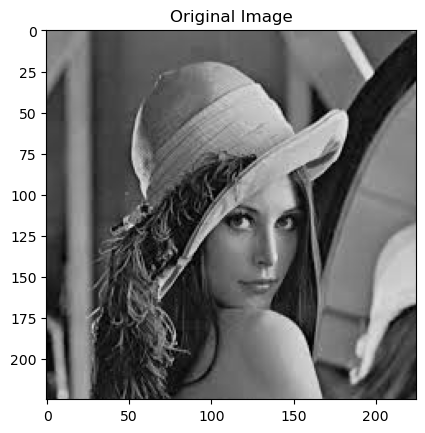

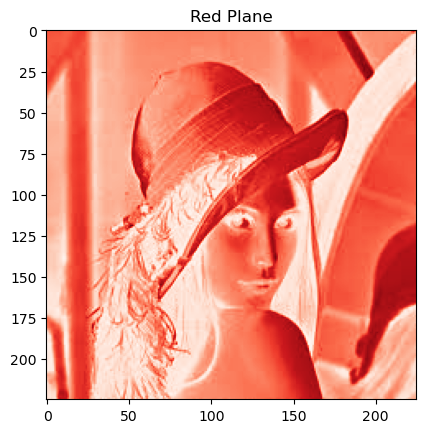

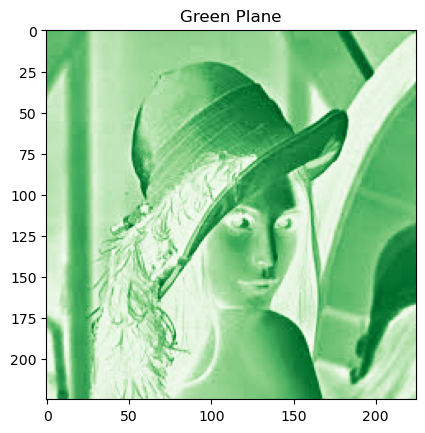

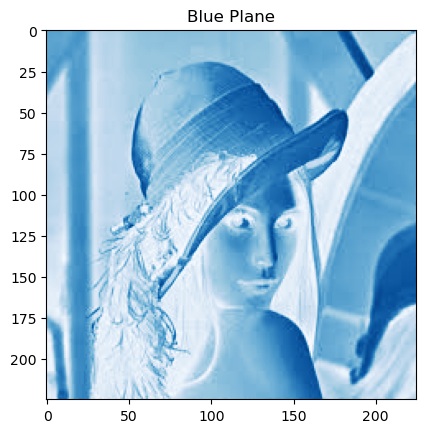

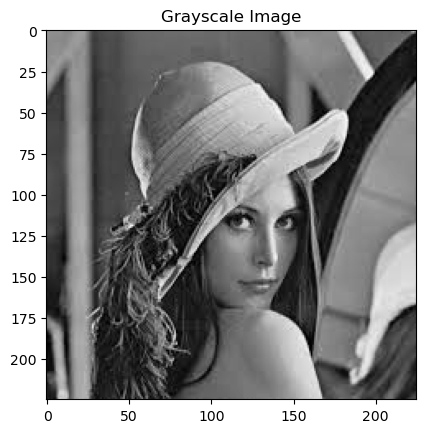

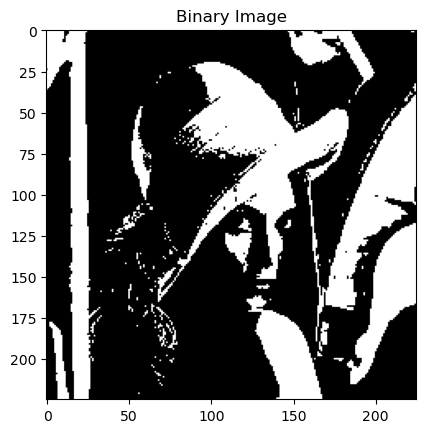

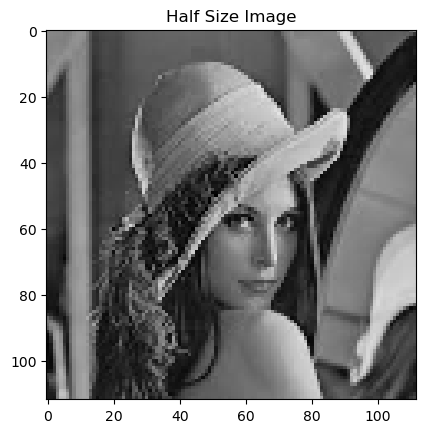

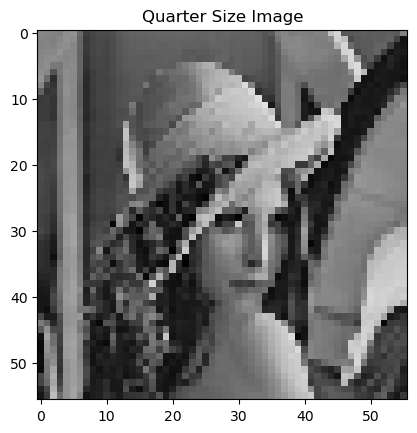

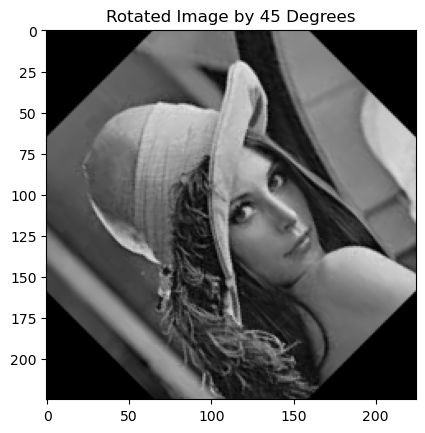

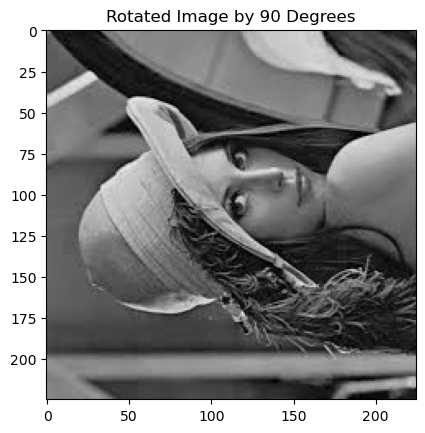

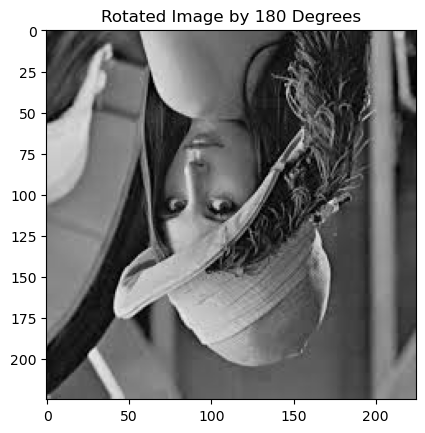

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display images with descriptions using Matplotlib
def display_with_description(description, image, cmap=None):
    plt.figure()
    plt.title(description)
    if cmap:
        plt.imshow(image, cmap=cmap)
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('on')  # Turn on the axes
    plt.show()

# Read an image
image = cv2.imread('Lena.jpg')  # Replace 'input_image.jpg' with your image file

# Display the original image
display_with_description('Original Image', image)

# Write the image in another format (e.g., PNG)
cv2.imwrite('output_image.png', image)

# Find RED, GREEN, and BLUE planes
blue, green, red = cv2.split(image)

display_with_description('Red Plane', red, cmap='Reds')
display_with_description('Green Plane', green, cmap='Greens')
display_with_description('Blue Plane', blue, cmap='Blues')

# Convert color image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
display_with_description('Grayscale Image', gray_image, cmap='gray')

# Convert grayscale image to binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
display_with_description('Binary Image', binary_image, cmap='gray')

# Resize the image to half and quarter
half_size = cv2.resize(image, (image.shape[1] // 2, image.shape[0] // 2))
quarter_size = cv2.resize(image, (image.shape[1] // 4, image.shape[0] // 4))

display_with_description('Half Size Image', half_size)
display_with_description('Quarter Size Image', quarter_size)

# Rotate the image by 45, 90, and 180 degrees
def rotate_image(image, angle):
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, matrix, (width, height))
    return rotated_image

rotate_45 = rotate_image(image, 45)
rotate_90 = rotate_image(image, 90)
rotate_180 = rotate_image(image, 180)

display_with_description('Rotated Image by 45 Degrees', rotate_45)
display_with_description('Rotated Image by 90 Degrees', rotate_90)
display_with_description('Rotated Image by 180 Degrees', rotate_180)

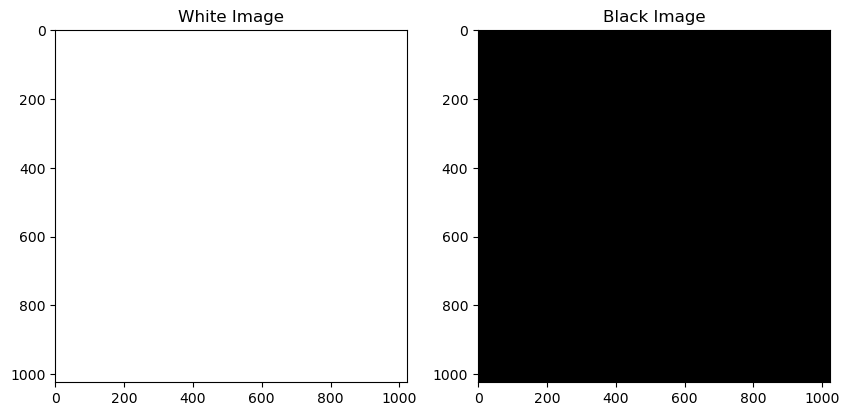

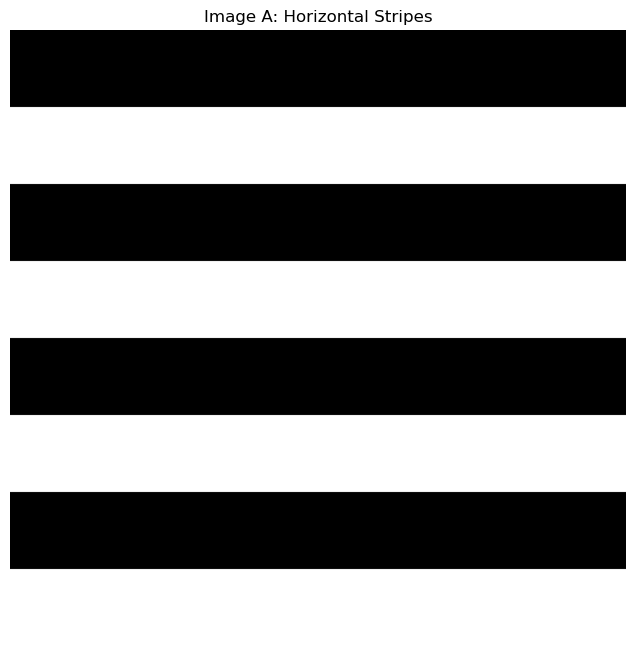

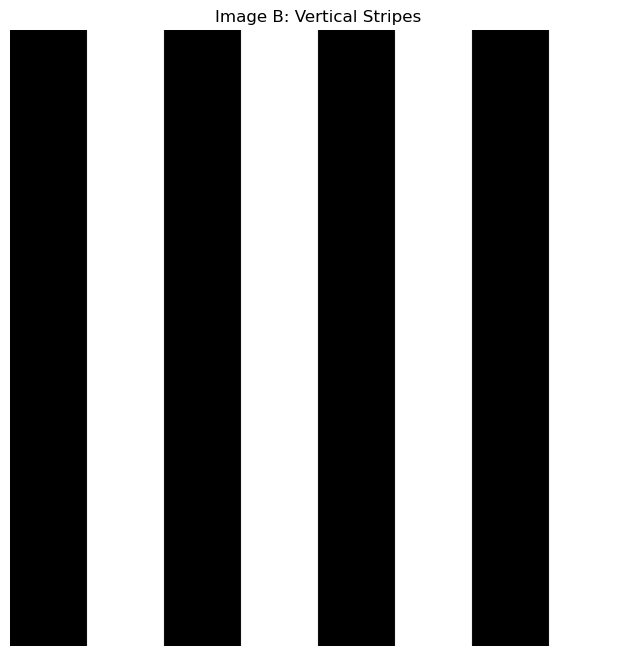

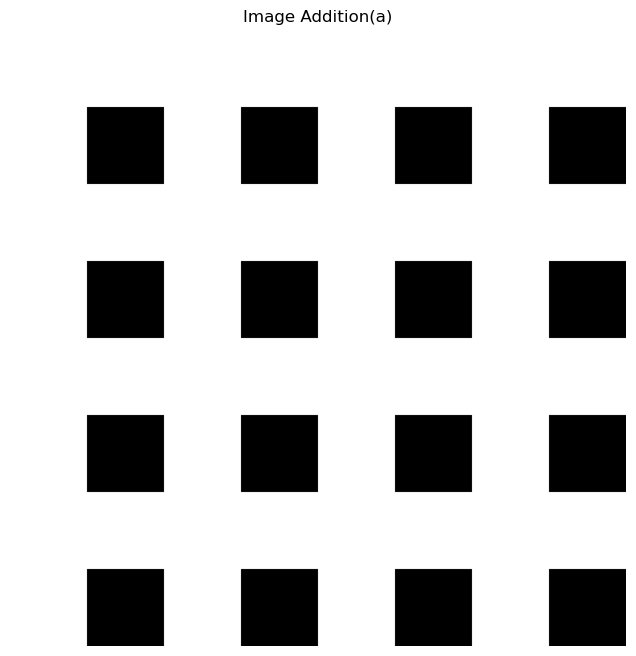

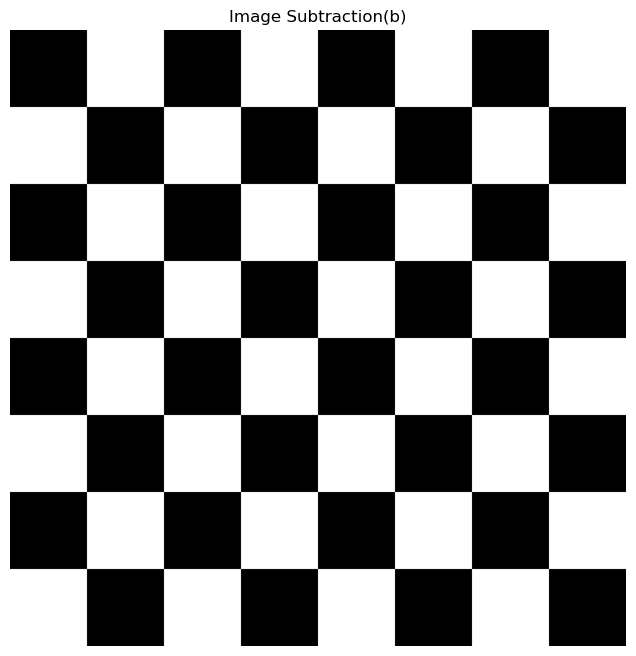

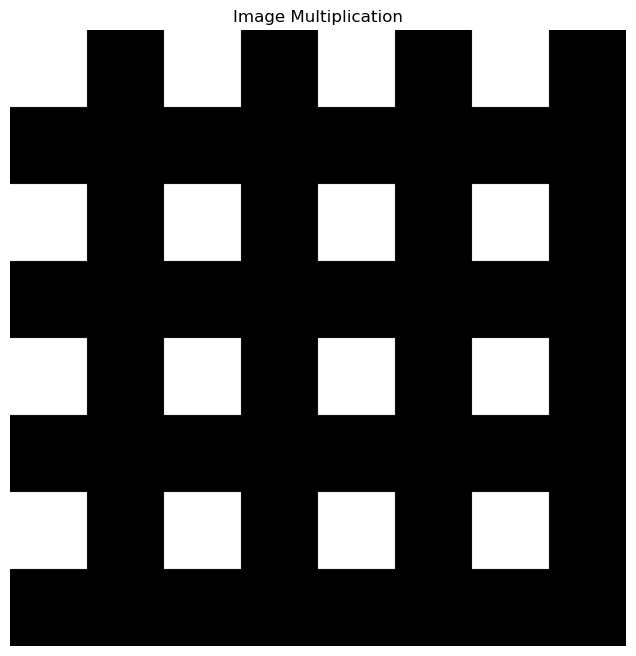

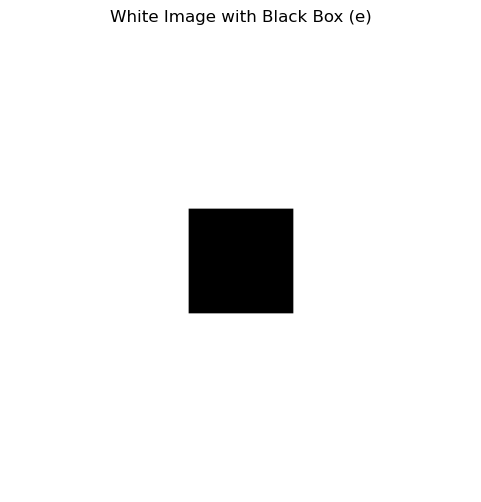

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create black and white images
img_a = np.ones((1024, 1024, 3), dtype=np.uint8) * 255
img_b = np.zeros((1024, 1024, 3), dtype=np.uint8)

# output1
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv2.cvtColor(img_a, cv2.COLOR_BGR2RGB))
axs[0].set_title('White Image')
axs[1].imshow(cv2.cvtColor(img_b, cv2.COLOR_BGR2RGB))
axs[1].set_title('Black Image')
plt.show()

# question A
width, height = 1024, 1024
stripe_height = 128

img_a = np.ones((height, width), dtype=np.uint8) * 255  
for y in range(0, height, stripe_height):
    color = 0 if (y // stripe_height) % 2 == 0 else 255
    img_a[y:y+stripe_height, :] = color

cv2.imwrite('image_a.png', img_a)

# output2.1
plt.figure(figsize=(8, 8))
plt.imshow(img_a, cmap='gray')
plt.title('Image A: Horizontal Stripes')
plt.axis('off')
plt.show()

# question b
stripe_width = 128

img_b = np.ones((height, width), dtype=np.uint8) * 255  
for x in range(0, width, stripe_width):
    color = 0 if (x // stripe_width) % 2 == 0 else 255
    img_b[:, x:x+stripe_width] = color

cv2.imwrite('image_b.png', img_b)

# output2.2
plt.figure(figsize=(8, 8))
plt.imshow(img_b, cmap='gray')
plt.title('Image B: Vertical Stripes')
plt.axis('off')
plt.show()



# question c(binary and grey)
pixels_a = (img_a == 0).astype(np.uint8)
pixels_b = (img_b == 0).astype(np.uint8)

# addition 2.3
result_add = np.clip(pixels_a + pixels_b, 0, 1) * 255
cv2.imwrite('image_add.png', result_add)

# output a
plt.figure(figsize=(8, 8))
plt.imshow(result_add, cmap='gray')
plt.title('Image Addition(a)')
plt.axis('off')
plt.show()

# subtraction 2.4
result_sub = np.clip(pixels_a - pixels_b, 0, 1) * 255
cv2.imwrite('image_sub.png', result_sub)

# output b
plt.figure(figsize=(8, 8))
plt.imshow(result_sub, cmap='gray')
plt.title('Image Subtraction(b)')
plt.axis('off')
plt.show()

# multiplication 2.5
result_mul = np.clip(pixels_a * pixels_b, 0, 1) * 255
cv2.imwrite('image_mul.png', result_mul)

# output c
plt.figure(figsize=(8, 8))
plt.imshow(result_mul, cmap='gray')
plt.title('Image Multiplication')
plt.axis('off')
plt.show()


# black box 2.5 
size = 256
box_size = 58
box_start = (size - box_size) // 2

# Create a white image
img_white_box = np.ones((size, size), dtype=np.uint8) * 255

# Draw a black box
img_white_box[box_start:box_start+box_size, box_start:box_start+box_size] = 0

cv2.imwrite('white_image_with_black_box.png', img_white_box)

# Display Image with Black Box
plt.figure(figsize=(6, 6))
plt.imshow(img_white_box, cmap='gray')
plt.title('White Image with Black Box (e)')
plt.axis('off')
plt.show()




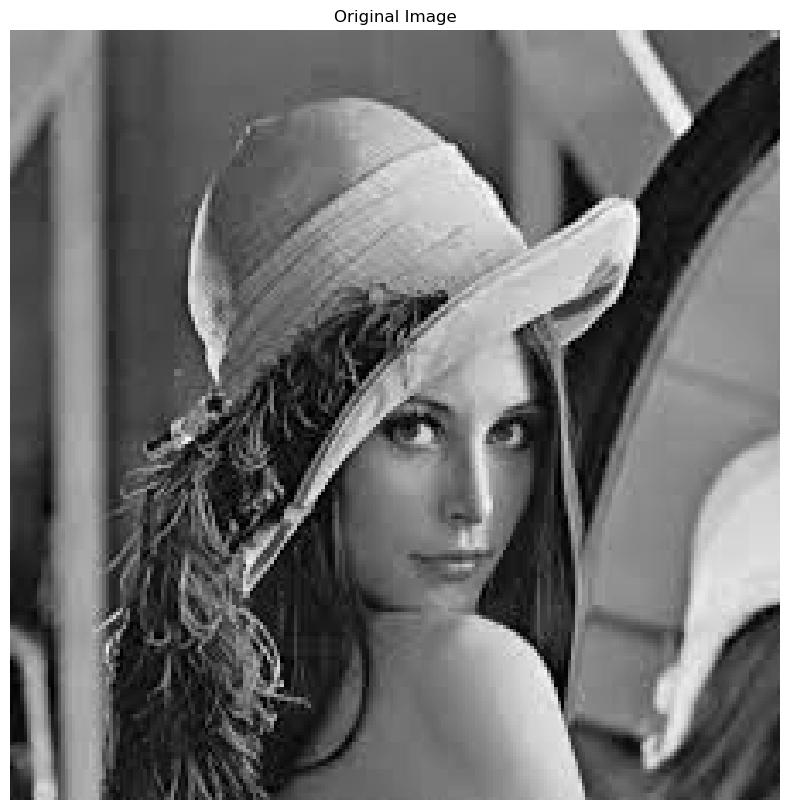

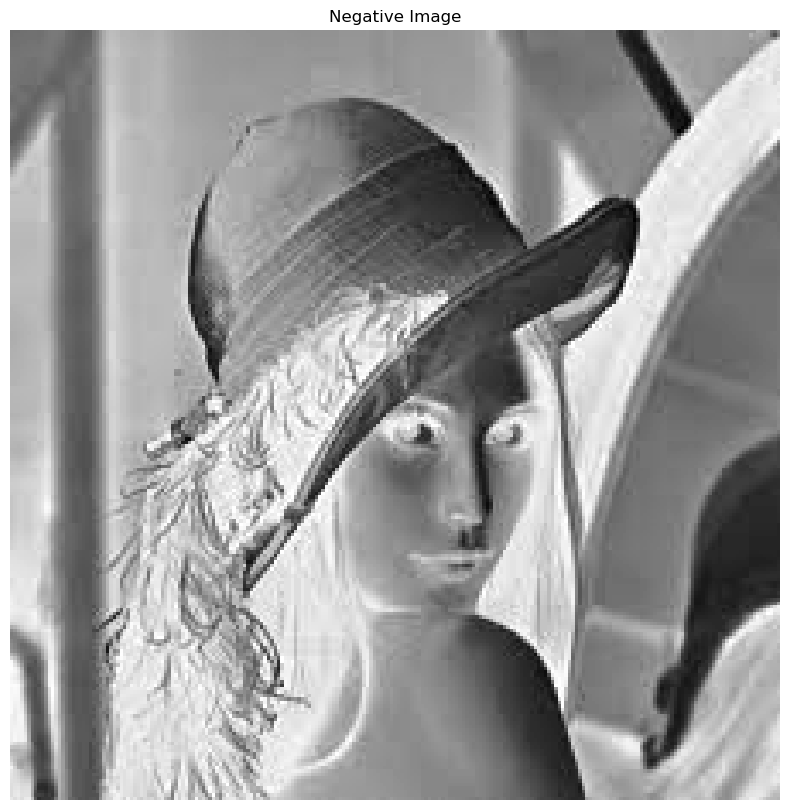

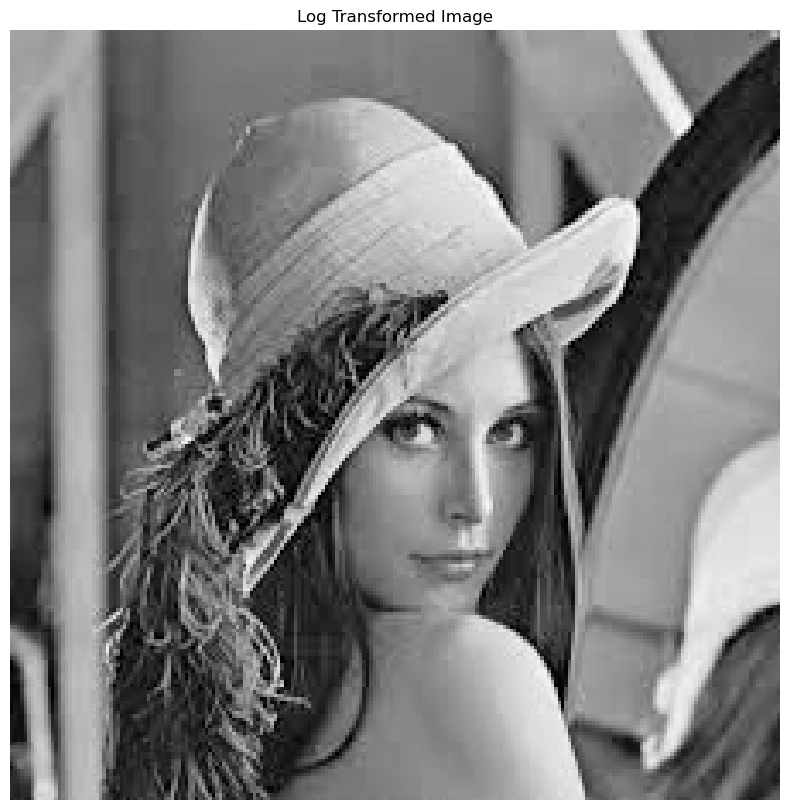

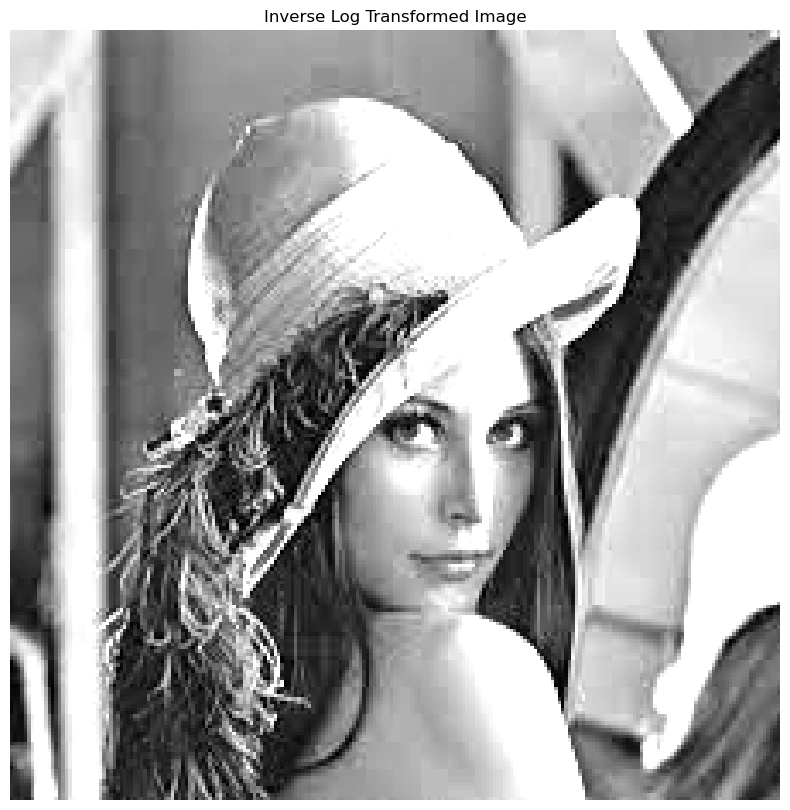

NameError: name 'gray_img' is not defined

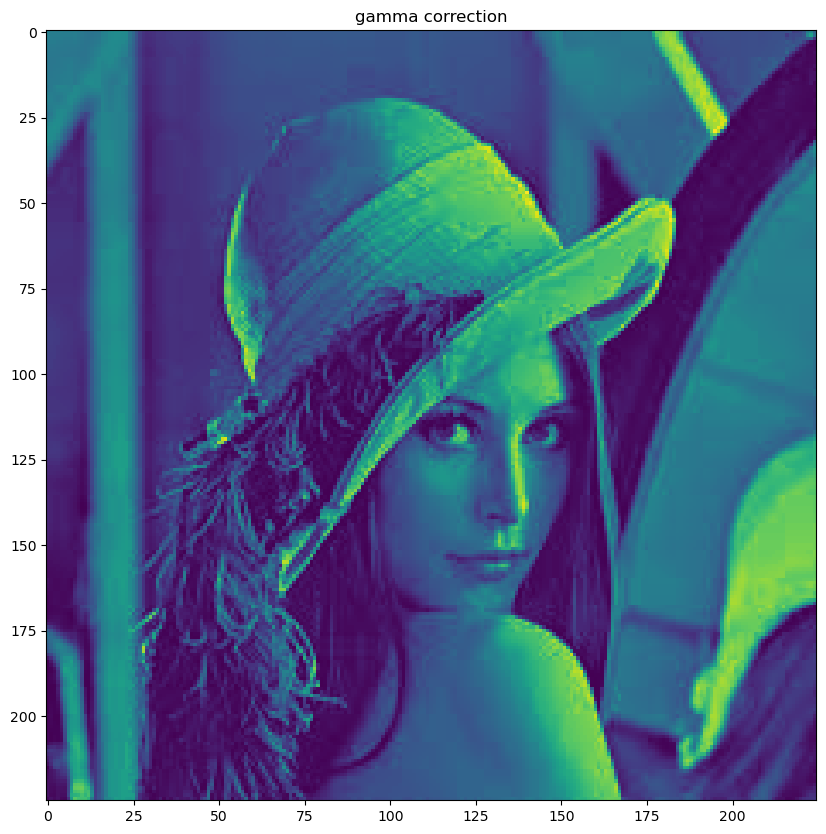

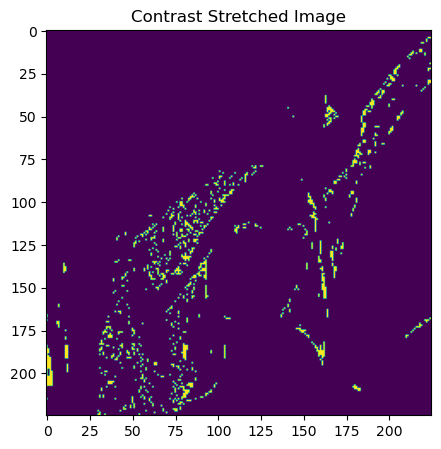

<Figure size 500x500 with 0 Axes>

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the image
path = "C:/Users/kavit/Lena.jpg"

# Read the image in grayscale
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError(f"Image file at path {path} not found or cannot be opened.")

# Display the original image
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap="gray")
plt.title('Original Image')
plt.axis('off')
plt.show()

# Image Negative
negative_img = 255 - img
plt.figure(figsize=(10, 10))
plt.imshow(negative_img, cmap="gray")
plt.title('Negative Image')
plt.axis('off')
plt.show()

# Log Transformation and Inverse Log Transformation
log_img = np.log1p(img / 255.0)  # Use log1p for log(1+x) to avoid issues with log(0)
log_img = np.uint8(255 * (log_img / np.max(log_img)))  # Normalize to 0-255
plt.figure(figsize=(10, 10))
plt.imshow(log_img, cmap="gray")
plt.title("Log Transformed Image")
plt.axis('off')
plt.show()

inverse_log_img = np.expm1(log_img / 255.0)  # Use expm1 for exp(x) - 1
inverse_log_img = np.uint8(np.clip(inverse_log_img * 255, 0, 255))
plt.figure(figsize=(10, 10))
plt.imshow(inverse_log_img, cmap="gray")
plt.title("Inverse Log Transformed Image")
plt.axis('off')
plt.show()

# gamma correction
gamma = 1.5
power_law_img = np.power(img / 255.0, gamma) * 255
power_law_img = np.uint8(np.clip(power_law_img, 0, 255))
plt.figure(figsize=(10, 10))
plt.imshow(power_law_img, )
plt.title(f'gamma correction')

# Contrast Stretching
min_val = np.min(img)
max_val = np.max(img)
stretched_img = np.clip((img - min_val) * 255 / (max_val - min_val), 0, 255).astype(np.uint8)
plt.figure(figsize=(5, 5))
plt.imshow(stretched_img)
plt.title("Contrast Stretched Image")


# Gray Level Slicing
threshold = 128
binary_img = np.where(img > threshold, 255, 0).astype(np.uint8)
plt.figure(figsize=(5, 5))
plt.imshow(gray_img)
plt.title(f'Gray Level Slicing')

